In [ ]:
import wandb
from tqdm import tqdm
import pandas as pd

# Replace with your organization, project, and sweep ID
entity = "mcv-team-6"  # your org name
project = "C3-Week4"      # your project name
sweep_id = "l0zokq5e"         # your sweep ID

api = wandb.Api()
sweep = api.sweep(f"{entity}/{project}/{sweep_id}")
best_acc = 0
best_run = None

frame_rows = {
    'Parameters' : [],
    'Accuracy' : [],
    'Config' : []
}

for run in tqdm(sweep.runs, desc="Scanning sweep runs"):
    
    history = run.history(keys=["test_acc"])
    
    acc = 0
    if not history.empty:
        acc = history["test_acc"].max()
        frame_rows['Accuracy'].append(acc)
        frame_rows['Parameters'].append(run.config['parameters'])
        frame_rows['Config'].append(run.config)
    
    if acc > best_acc:
        best_acc = acc
        best_run = run
        

df = pd.DataFrame(frame_rows)
print(f"Best test_accuracy: {best_acc}")
print(f"Best run URL: {best_run.url}")
print("Configuration that achieved it:")
for k, v in best_run.config.items():
    print(f"  {k}: {v}")

Scanning sweep runs: 100%|██████████| 1296/1296 [19:53<00:00,  1.09it/s]

Best test_accuracy: 0.878496527671814
Best run URL: https://wandb.ai/mcv-team-6/C3-Week4/runs/k2fas4ak
Configuration that achieved it:
  layers_8: 0
  layers_16: 1
  layers_24: 0
  layers_32: 5
  parameters: 7657


In [10]:
import joblib

joblib.dump(best_run.config, "best_layer_comb.joblib")
joblib.dump(df, "sweep_run_df.joblib")

['sweep_run_df.joblib']

In [17]:
df = joblib.load("sweep_run_df.joblib")

param_sort = df.sort_values(by="Parameters", ignore_index=True)

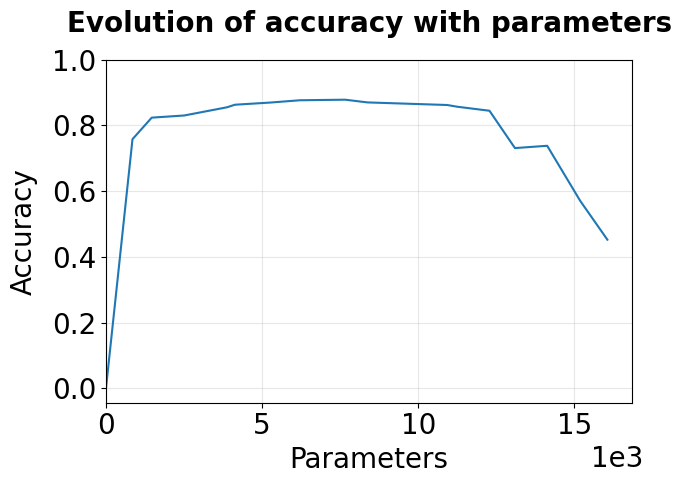

In [46]:
import numpy as np
import matplotlib.pyplot as plt

idxs = []

limits = [1000*i for i in range(1, 17)]

mask = param_sort["Parameters"] <= 1000
idxs.append(param_sort.loc[mask, "Accuracy"].idxmax())
last_lim = 1000

for limit in limits[1:]:
    mask = (param_sort["Parameters"] <= limit) & (param_sort["Parameters"] > last_lim)
    idxs.append(param_sort.loc[mask, "Accuracy"].idxmax())
    last_lim = limit
    
mask = param_sort["Parameters"] > last_lim
idxs.append(param_sort.loc[mask, "Accuracy"].idxmax())

values = np.concat([[0], param_sort.loc[idxs, 'Accuracy']])
parameters = np.concat([[0], param_sort.loc[idxs, 'Parameters']])


plt.plot(parameters, values)
plt.title("Evolution of accuracy with parameters", fontsize=20, pad=20, fontweight='bold')
plt.ylabel("Accuracy", fontsize=20, labelpad=10)
plt.xlabel("Parameters", fontsize=20)
plt.xlim(left=0)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.grid(True, alpha=0.3)
plt.ticklabel_format(axis="x", style="sci", scilimits=(3, 3))
offset = plt.gca().xaxis.get_offset_text()
offset.set_size(20)      # make it bigger
offset.set_x(1.02)       # move it to the right (try 1.01–1.1)
plt.tight_layout()
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.show()

In [ ]:
¡
best_idx = np.argmax(parameters)
print(best_idx)
print(f'Optimal configuration:\n\t{param_sort.loc[idxs[best_idx-1], "Config"]}')
print(f"Optimal values:\n\tParameters : {parameters[best_idx]}\n\tAccuracy : {values[best_idx]}")

2
Optimal configuration:
	{'layers_8': 5, 'layers_16': 0, 'layers_24': 0, 'layers_32': 1, 'parameters': 1465}
Optimal values:
	Parameters : 1465
	Accuracy : 0.8238636255264282
